In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# select a file from data directory
df=pd.read_csv('visitItemSpend.csv') # use it when file does not have headers

In [9]:
# make it 2-D by extracting first and second columns
X_ = df.iloc[0:,[1,2,3]].values 

In [10]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X=mms.fit_transform(X_)

In [17]:
from sklearn.cluster import KMeans

# n_init=10 means run 10 experiments and choose the best model based on SSE
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X) # predict cluster labels
print(len(y_km))

1823


In [20]:
# Print Cluster Centroids 
print('Cluster 1 Centroid:', km.cluster_centers_[0, 0],km.cluster_centers_[0, 1],km.cluster_centers_[0, 2])
print('Cluster 2 Centroid:', km.cluster_centers_[1, 0],km.cluster_centers_[1, 1],km.cluster_centers_[1, 2])
print('Cluster 3 Centroid:', km.cluster_centers_[2, 0],km.cluster_centers_[2, 1],km.cluster_centers_[2, 2])
print('Cluster 4 Centroid:', km.cluster_centers_[3, 0],km.cluster_centers_[3, 1],km.cluster_centers_[3, 2])

Cluster 1 Centroid: 0.18840579710144925 0.32329988851727987 0.3477838879290284
Cluster 2 Centroid: 0.013085399449035822 0.10828565374019944 0.14046939746953116
Cluster 3 Centroid: 0.000968992248062012 0.018435698668256794 0.027660226459515477
Cluster 4 Centroid: 0.06666666666666667 0.558974358974359 0.7529935387260475


[[0.1884058  0.32329989 0.34778389]
 [0.0130854  0.10828565 0.1404694 ]
 [0.00096899 0.0184357  0.02766023]
 [0.06666667 0.55897436 0.75299354]]


/var/folders/6f/b88k5vf17wq0ztnyv_qktnv40000gn/T/ipykernel_11477/3614331495.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[y_km[i]], cmap='viridis', s=50)


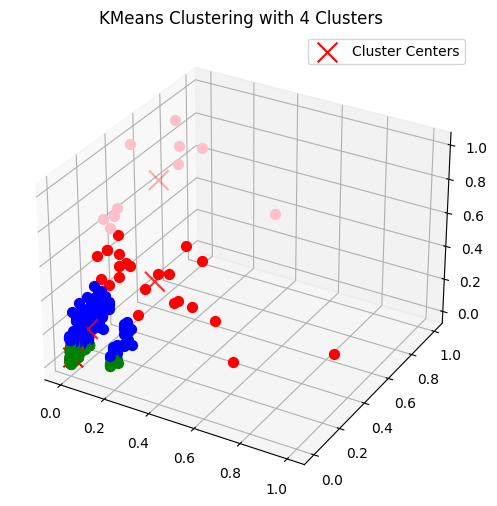

In [24]:
data = X
# Get the cluster centers
cluster_centers = km.cluster_centers_
print(cluster_centers)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Define unique colors for each cluster
colors = ['red', 'blue', 'green', 'pink']  # Example colors (you can use any desired colors)

# Plot each data point with its cluster color
for i in range(len(data)):
    ax.scatter(data[i, 0], data[i, 1], data[i, 2], c=colors[y_km[i]], cmap='viridis', s=50)

# Plot the cluster centers
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='red', marker='x', s=200, label='Cluster Centers')

ax.set_title('KMeans Clustering with 4 Clusters')
ax.legend()
#plt.show()

plt.legend(scatterpoints=1)
plt.grid()
plt.savefig('cluster.png', dpi=300) # This will generate a image to use in your final reports
plt.show()

In [25]:
from collections import Counter

# Create a counter dictionary
counter_dict = Counter(y_km)

# Print the counter dictionary
print(counter_dict)

Counter({2: 1548, 1: 242, 0: 23, 3: 10})
